In [1]:
# Reading Libraries
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
import pandas_profiling
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading file as input
df=pd.read_excel('Sales_Data.xlsx')
df.sample(5)

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
1098        10147               37     119.06                9  4405.22   
493         10312               25      44.21                9  1105.25   
2627        10232               48      96.16                1  4615.68   
431         10161               28     134.46               12  3764.88   
2132        10169               26      39.83                9  1035.58   

      ORDERDATE  DAYS_SINCE_LASTORDER   STATUS   PRODUCTLINE  MSRP  \
1098 2018-09-05                  1733  Shipped  Classic Cars   146   
493  2019-10-21                   717  Shipped  Vintage Cars    53   
2627 2019-03-20                  3066  Shipped         Ships   100   
431  2018-10-17                  1024  Shipped  Classic Cars   141   
2132 2018-11-04                  2707  Shipped   Motorcycles    40   

     PRODUCTCODE                  CUSTOMERNAME           PHONE  \
1098    S18_3482    Collectables For Less Inc.      6175558555   
493     S18_1367  Mini Gifts Distributors Ltd.      4155551450   
2627   S700_3505             giftsbymail.co.uk  (198) 555-8888   
431     S18_1129          Heintze Collectables      86 21 3555   
2132    S32_2206       Anna's Decorations, Ltd    02 9936 8555   

                   ADDRESSLINE1          CITY POSTALCODE    COUNTRY  \
1098           7825 Douglas Av.    Brickhaven      58339        USA   
493             5677 Strong St.    San Rafael      97562        USA   
2627  Garden House Crowther Way         Cowes   PO31 7PJ         UK   
431               Smagsloget 45       Aaarhus       8200    Denmark   
2132          201 Miller Street  North Sydney       2060  Australia   

     CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
1098          Nelson            Allen   Medium  
493           Nelson          Valarie    Small  
2627         Bennett            Helen   Medium  
431            Ibsen            Palle   Medium  
2132          O'Hara             Anna    Small

In [3]:
# Data information - column names, rows, null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [4]:
# Columns and Rows
print("Number of rows-",df.shape[0],"\nNumber of columns-",df.shape[1])

Number of rows- 2747 
Number of columns- 20


In [5]:
# Null values
df.isna().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [6]:
# 5 number summary i.e Data Description
df.describe().T

count          mean          std       min        25%  \
ORDERNUMBER           2747.0  10259.761558    91.877521  10100.00  10181.000   
QUANTITYORDERED       2747.0     35.103021     9.762135      6.00     27.000   
PRICEEACH             2747.0    101.098951    42.042548     26.88     68.745   
ORDERLINENUMBER       2747.0      6.491081     4.230544      1.00      3.000   
SALES                 2747.0   3553.047583  1838.953901    482.13   2204.350   
DAYS_SINCE_LASTORDER  2747.0   1757.085912   819.280576     42.00   1077.000   
MSRP                  2747.0    100.691664    40.114802     33.00     68.000   

                           50%        75%       max  
ORDERNUMBER           10264.00  10334.500  10425.00  
QUANTITYORDERED          35.00     43.000     97.00  
PRICEEACH                95.55    127.100    252.87  
ORDERLINENUMBER           6.00      9.000     18.00  
SALES                  3184.80   4503.095  14082.80  
DAYS_SINCE_LASTORDER   1761.00   2436.500   3562.00  
MSRP                     99.00    124.000    214.00

In [7]:
# Unique values for Categorical Data
for column in df[['STATUS','PRODUCTLINE','CITY','COUNTRY','DEALSIZE']]:
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

STATUS :  6
Disputed        14
In Process      41
On Hold         44
Resolved        47
Cancelled       60
Shipped       2541
Name: STATUS, dtype: int64


PRODUCTLINE :  7
Trains               77
Ships               230
Trucks and Buses    295
Planes              304
Motorcycles         313
Vintage Cars        579
Classic Cars        949
Name: PRODUCTLINE, dtype: int64


CITY :  71
Charleroi       8
Burbank        13
Munich         14
Sevilla        15
Brisbane       15
             ... 
Paris          70
Singapore      79
NYC           152
San Rafael    180
Madrid        304
Name: CITY, Length: 71, dtype: int64


COUNTRY :  19
Ireland         16
Philippines     26
Switzerland     31
Belgium         33
Japan           52
Austria         55
Sweden          57
Germany         62
Denmark         63
Canada          70
Singapore       79
Norway          85
Finland         92
Italy          113
UK             144
Australia      185
France         314
Spain          342
USA            928
Nam

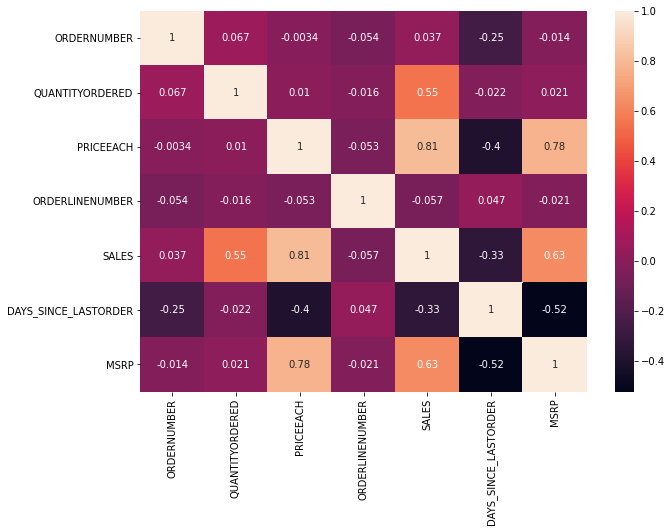

In [8]:
#HeatMap showing Correlations
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

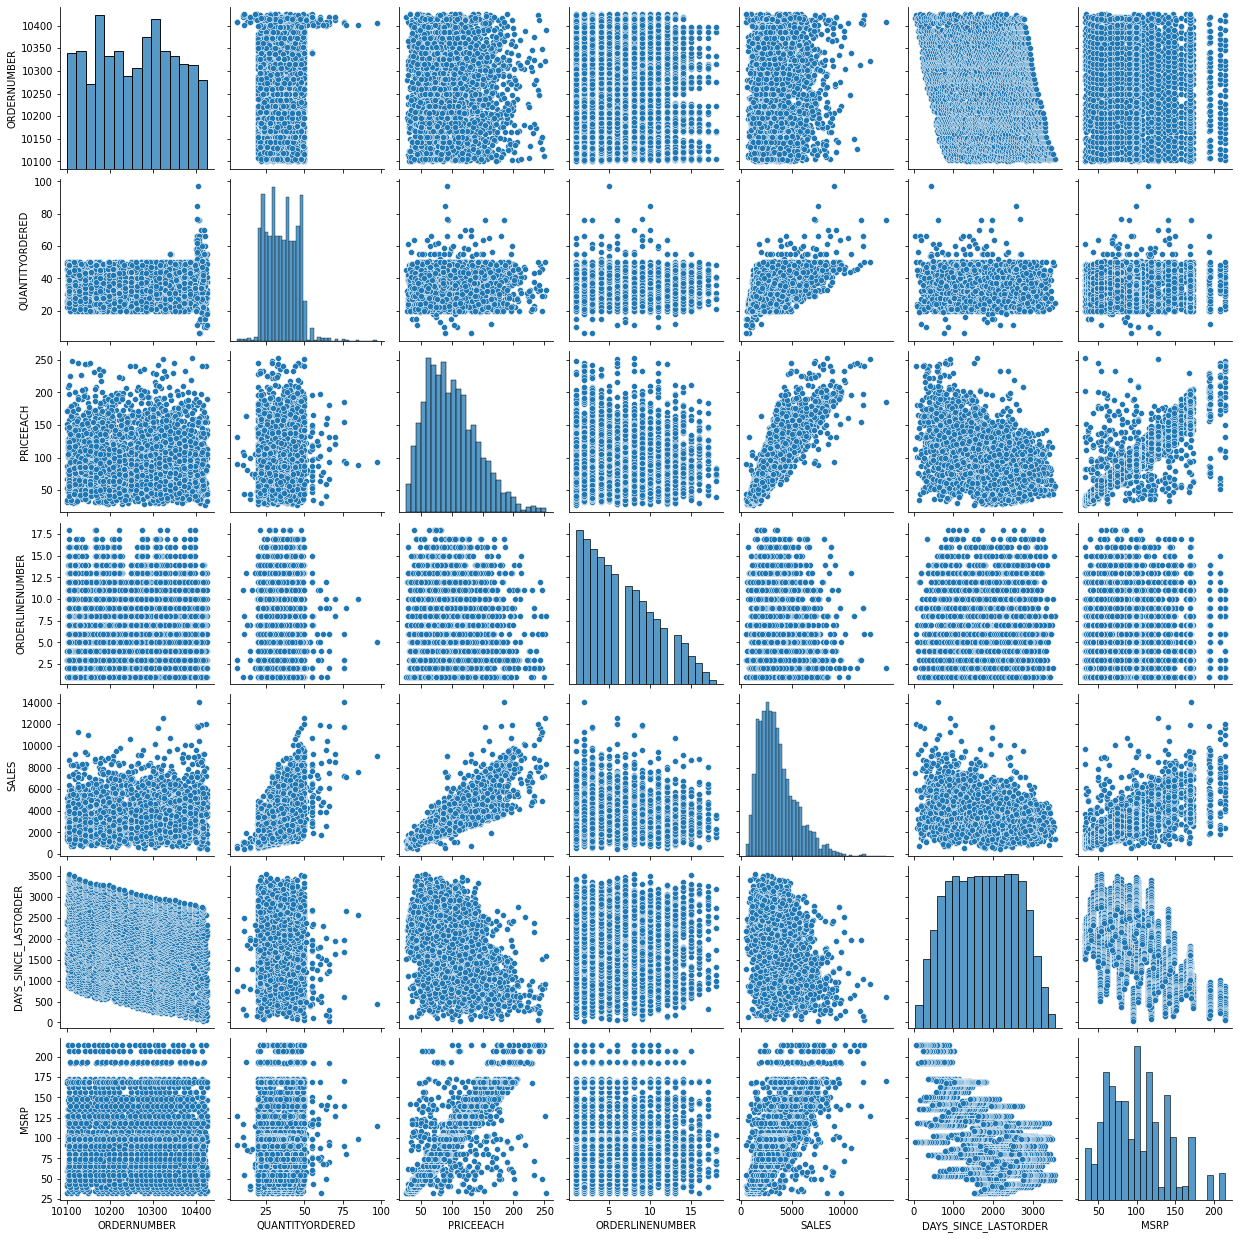

In [9]:
#Pairplot
sns.pairplot(df)

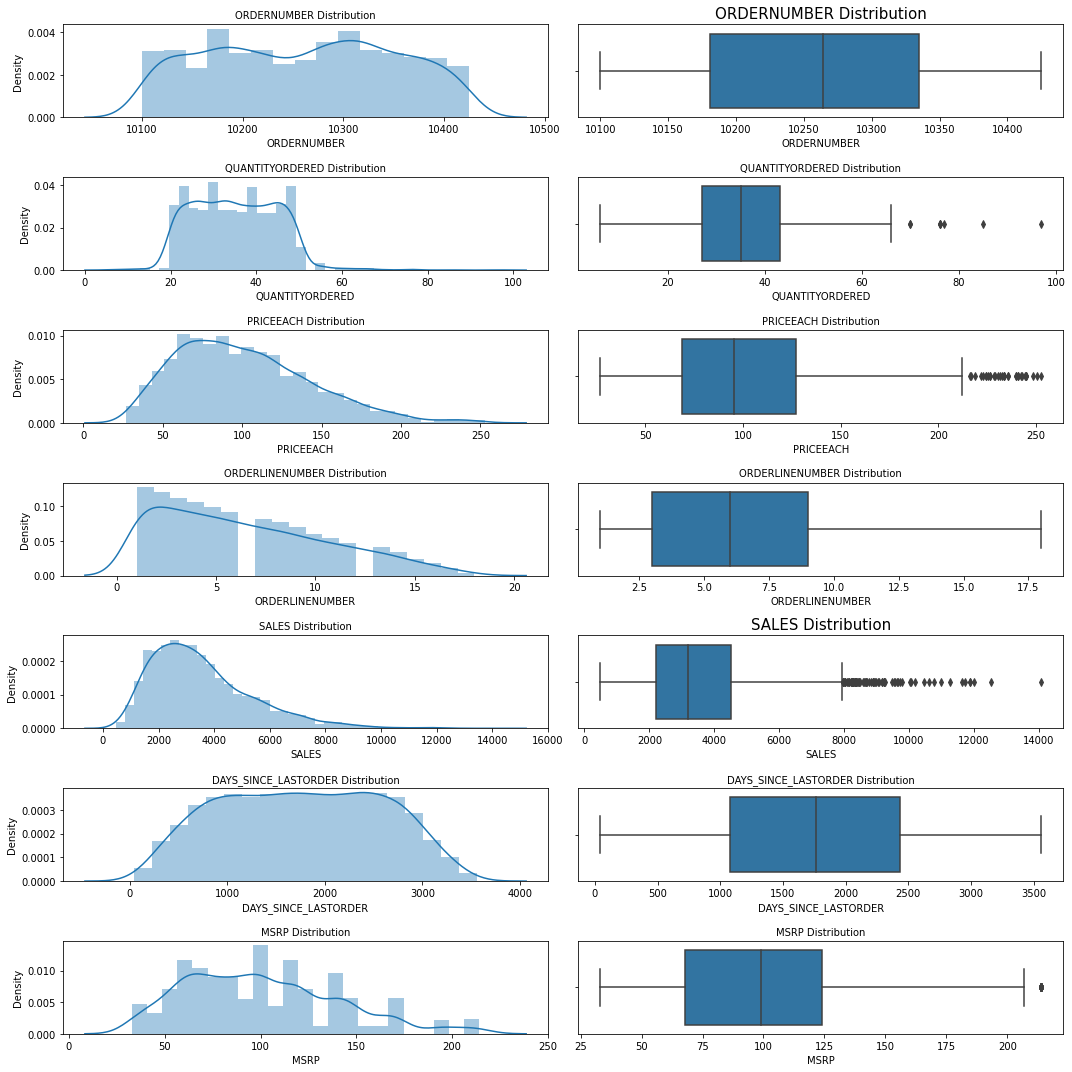

In [11]:
#Distribution Plot and BoxPlot for Numerical Varia
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(15, 15)

a = sns.distplot(df['ORDERNUMBER'] , ax=axes[0][0])
a.set_title("ORDERNUMBER Distribution",fontsize=10)
a = sns.boxplot(df['ORDERNUMBER'] , orient = "v" , ax=axes[0][1])
a.set_title("ORDERNUMBER Distribution",fontsize=15)
fig.tight_layout()

a = sns.distplot(df['QUANTITYORDERED'] , ax=axes[1][0])
a.set_title("QUANTITYORDERED Distribution",fontsize=10)
a = sns.boxplot(df['QUANTITYORDERED'] , orient = "v" , ax=axes[1][1])
a.set_title("QUANTITYORDERED Distribution",fontsize=10)
fig.tight_layout()

a = sns.distplot(df['PRICEEACH'] , ax=axes[2][0])
a.set_title("PRICEEACH Distribution",fontsize=10)
a = sns.boxplot(df['PRICEEACH'] , orient = "v" , ax=axes[2][1])
a.set_title("PRICEEACH Distribution",fontsize=10)
fig.tight_layout()

a = sns.distplot(df['ORDERLINENUMBER'] , ax=axes[3][0])
a.set_title("ORDERLINENUMBER Distribution",fontsize=10)
a = sns.boxplot(df['ORDERLINENUMBER'] , orient = "v" , ax=axes[3][1])
a.set_title("ORDERLINENUMBER Distribution",fontsize=10)
fig.tight_layout()

a = sns.distplot(df['SALES'] , ax=axes[4][0])
a.set_title("SALES Distribution",fontsize=10)
a = sns.boxplot(df['SALES'] , orient = "v" , ax=axes[4][1])
a.set_title("SALES Distribution",fontsize=15)
fig.tight_layout()

a = sns.distplot(df['DAYS_SINCE_LASTORDER'] , ax=axes[5][0])
a.set_title("DAYS_SINCE_LASTORDER Distribution",fontsize=10)
a = sns.boxplot(df['DAYS_SINCE_LASTORDER'] , orient = "v" , ax=axes[5][1])
a.set_title("DAYS_SINCE_LASTORDER Distribution",fontsize=10)
fig.tight_layout()

a = sns.distplot(df['MSRP'] , ax=axes[6][0])
a.set_title("MSRP Distribution",fontsize=10)
a = sns.boxplot(df['MSRP'] , orient = "v" , ax=axes[6][1])
a.set_title("MSRP Distribution",fontsize=10)
fig.tight_layout()


In [12]:
df.profile_report()